In [114]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from scipy.fft import rfft, rfftfreq

In [115]:
def loadtimeseries(series):
    dict_ts={}
    for i in series:
        dict_ts[i]=[]
        linecount=0
        out=[0]*200

        with open(i) as filein:
            spamreader=csv.reader(filein)
            for x in spamreader:
                if linecount>24:
                    out.append(float(x[0]))
                linecount=linecount+1

            for t in out:
                dict_ts[i].append(t)
    return dict_ts

In [116]:
series=['27873.sg1','22190.sg1','25204.sg1','3763.sg1','3766.sg1','7568.sg1','9533.txt','22190.sg1','3761.txt','7568.sg1','3762.sg1']


In [117]:
def plott(zz):    

    fig, ax=plt.subplots(1,1)
    plt.rcParams["figure.figsize"] = (40,30)
    for r in zz:
        x=[]
        for i in range(len(zz[r])):
            x.append(i)
        plt.plot(x[:-3500],zz[r][:-3500], label=r,linewidth=8,alpha=0.7)

    plt.legend(loc="upper left",fontsize=40)
    ax.set_xlabel('Time', fontsize=40)
    ax.set_ylabel('Amplitude',fontsize=40)

    plt.rc('xtick',labelsize=30)
    plt.rc('ytick',labelsize=30)
    plt.legend(loc="upper left",fontsize=40)

    plt.show()
    return

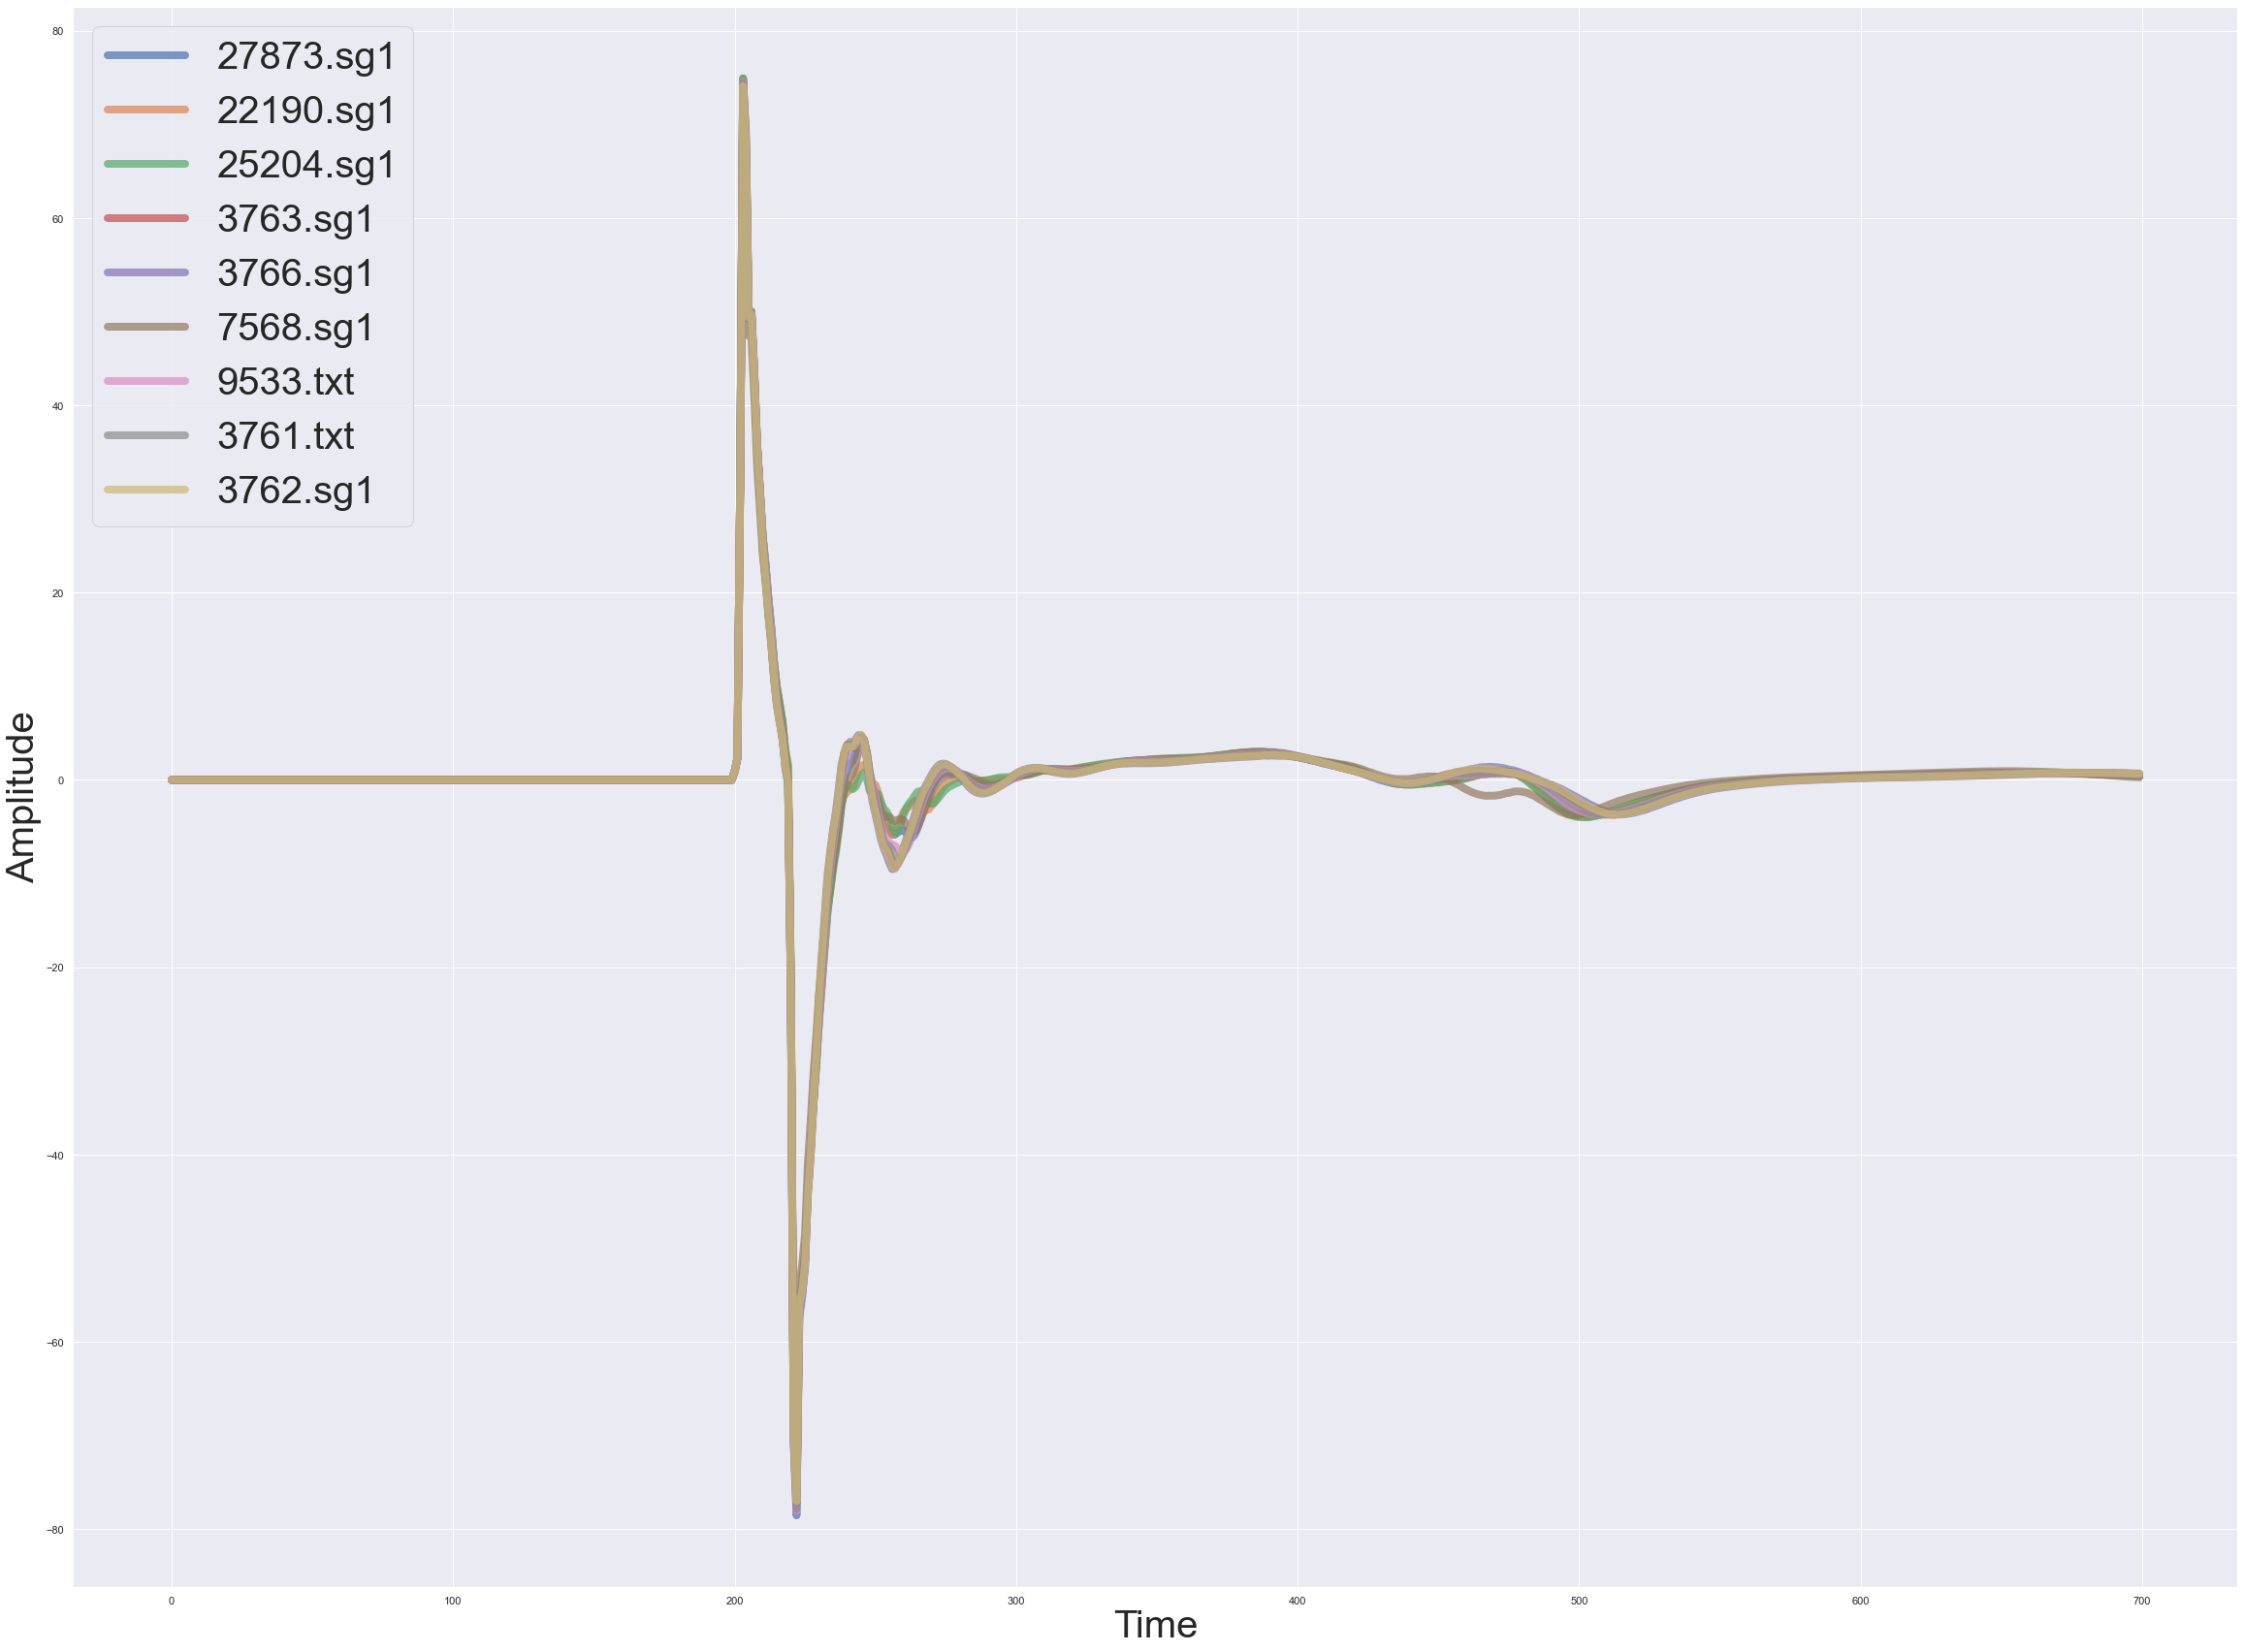

In [118]:
plott(loadtimeseries(series))

## Let's analyze one by one

In [110]:
def singleQC(zz):
    n=0
    for s in zz:

        if n==0:
            anom=s
        else:
            x=[]
            for i in range(len(zz[s])):
                x.append(i)
            fig, ax=plt.subplots(1,1)
            plt.rcParams["figure.figsize"] = (40,30)
            diff=[]
            for i in range(len(zz[s])):
                diff.append(zz[anom][i]-zz[s][i])
            plt.plot(x[:-3500],diff[:-3500],"-g", label="difference",linewidth=8,alpha=0.5)


            plt.plot(x[:-3500],zz[s][:-3500],"-r", label=s,linewidth=8,alpha=0.7)
            plt.plot(x[:-3500],zz[anom][:-3500],"-b", label="Nominal",linewidth=8,alpha=0.7)

            ax.set_xlabel('Time', fontsize=40)
            ax.set_ylabel('Amplitude',fontsize=40)

            plt.rc('xtick',labelsize=30)
            plt.rc('ytick',labelsize=30)
            plt.legend(loc="upper left",fontsize=40)

            plt.show()
            print ("the correlation is " ,np.corrcoef(zz[anom],zz[s])[0,1])
            print ('peak-2-peak Nominal --> ' + str(max(zz[anom])+abs(min(zz[anom]))))
            print ('peak-2-peak '+ s +' --> ' + str(max(zz[s])+abs(min(zz[s]))))
            print ('peak-2-peak difference %  --> negative ' 
               + str((((max(zz[anom])+abs(min(zz[anom])))-(max(zz[s])+abs(min(zz[s]))))/((max(zz[anom])+abs(min(zz[anom])))))*100))
            print ("")
            print ("")
        n=n+1
        
    return


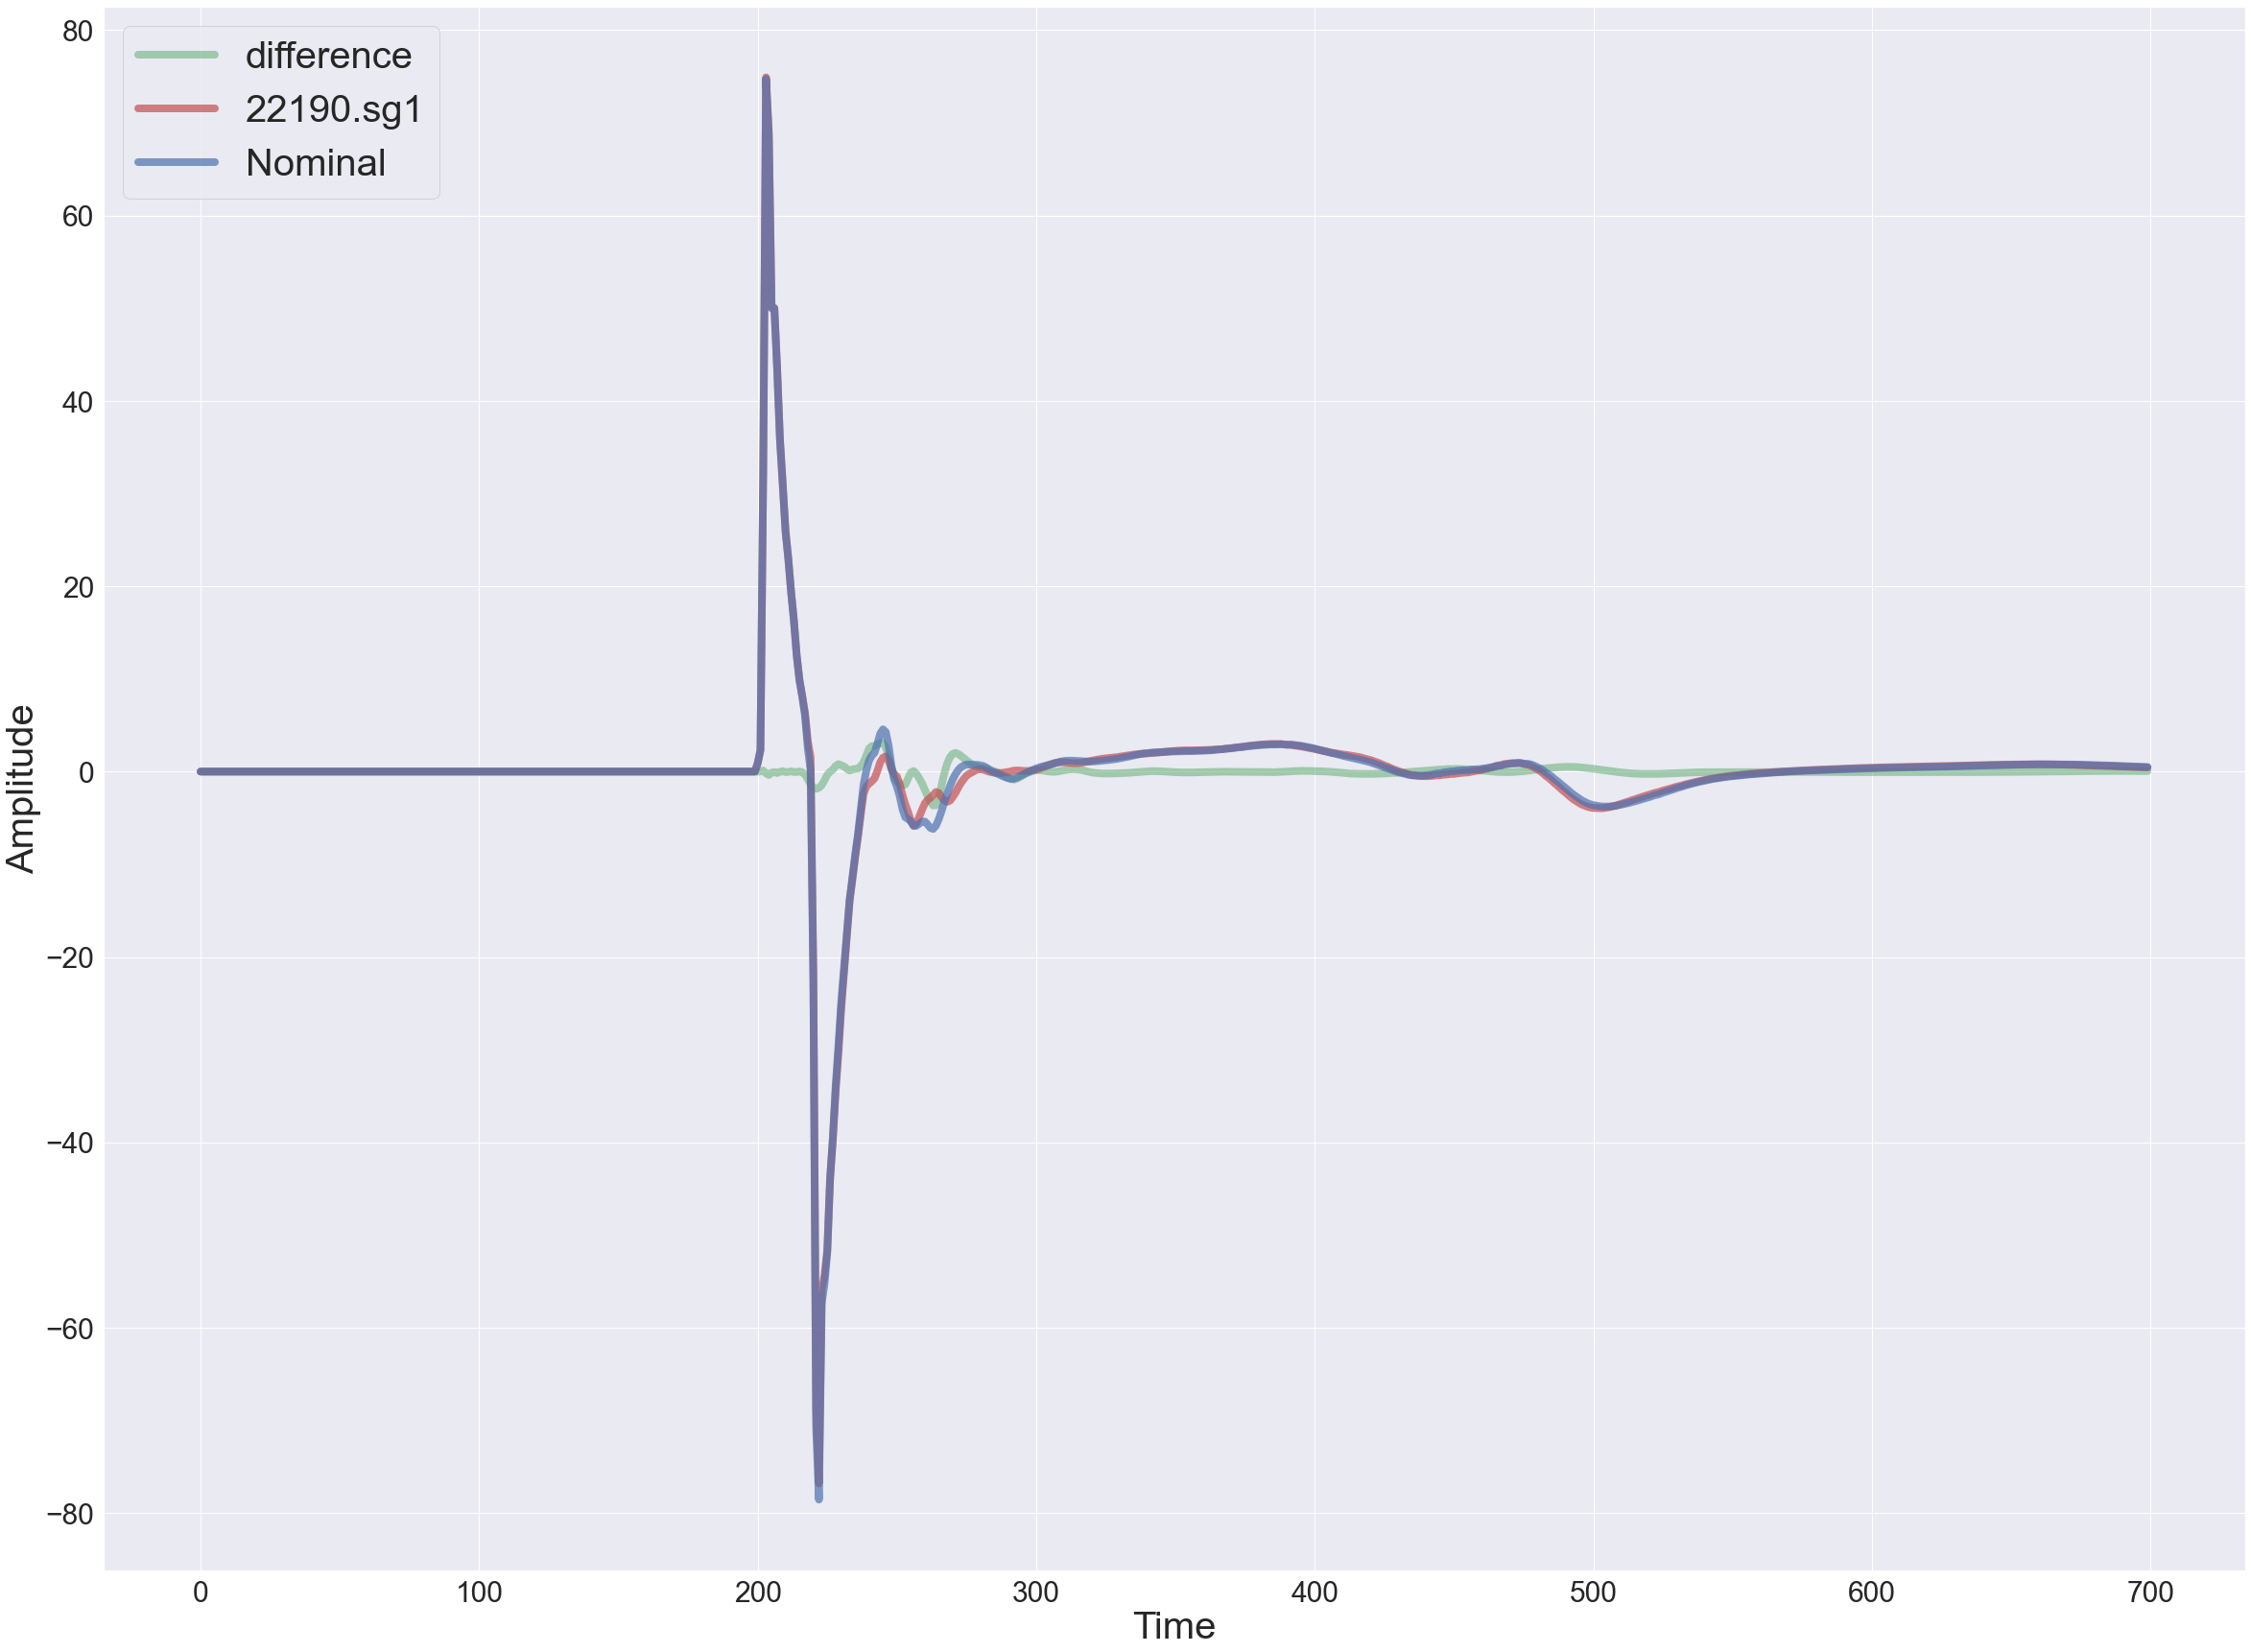

the correlation is  0.9982482294743984
peak-2-peak Nominal --> 153.27775
peak-2-peak 22190.sg1 --> 151.71439
peak-2-peak difference %  --> negative 1.0199523414194094




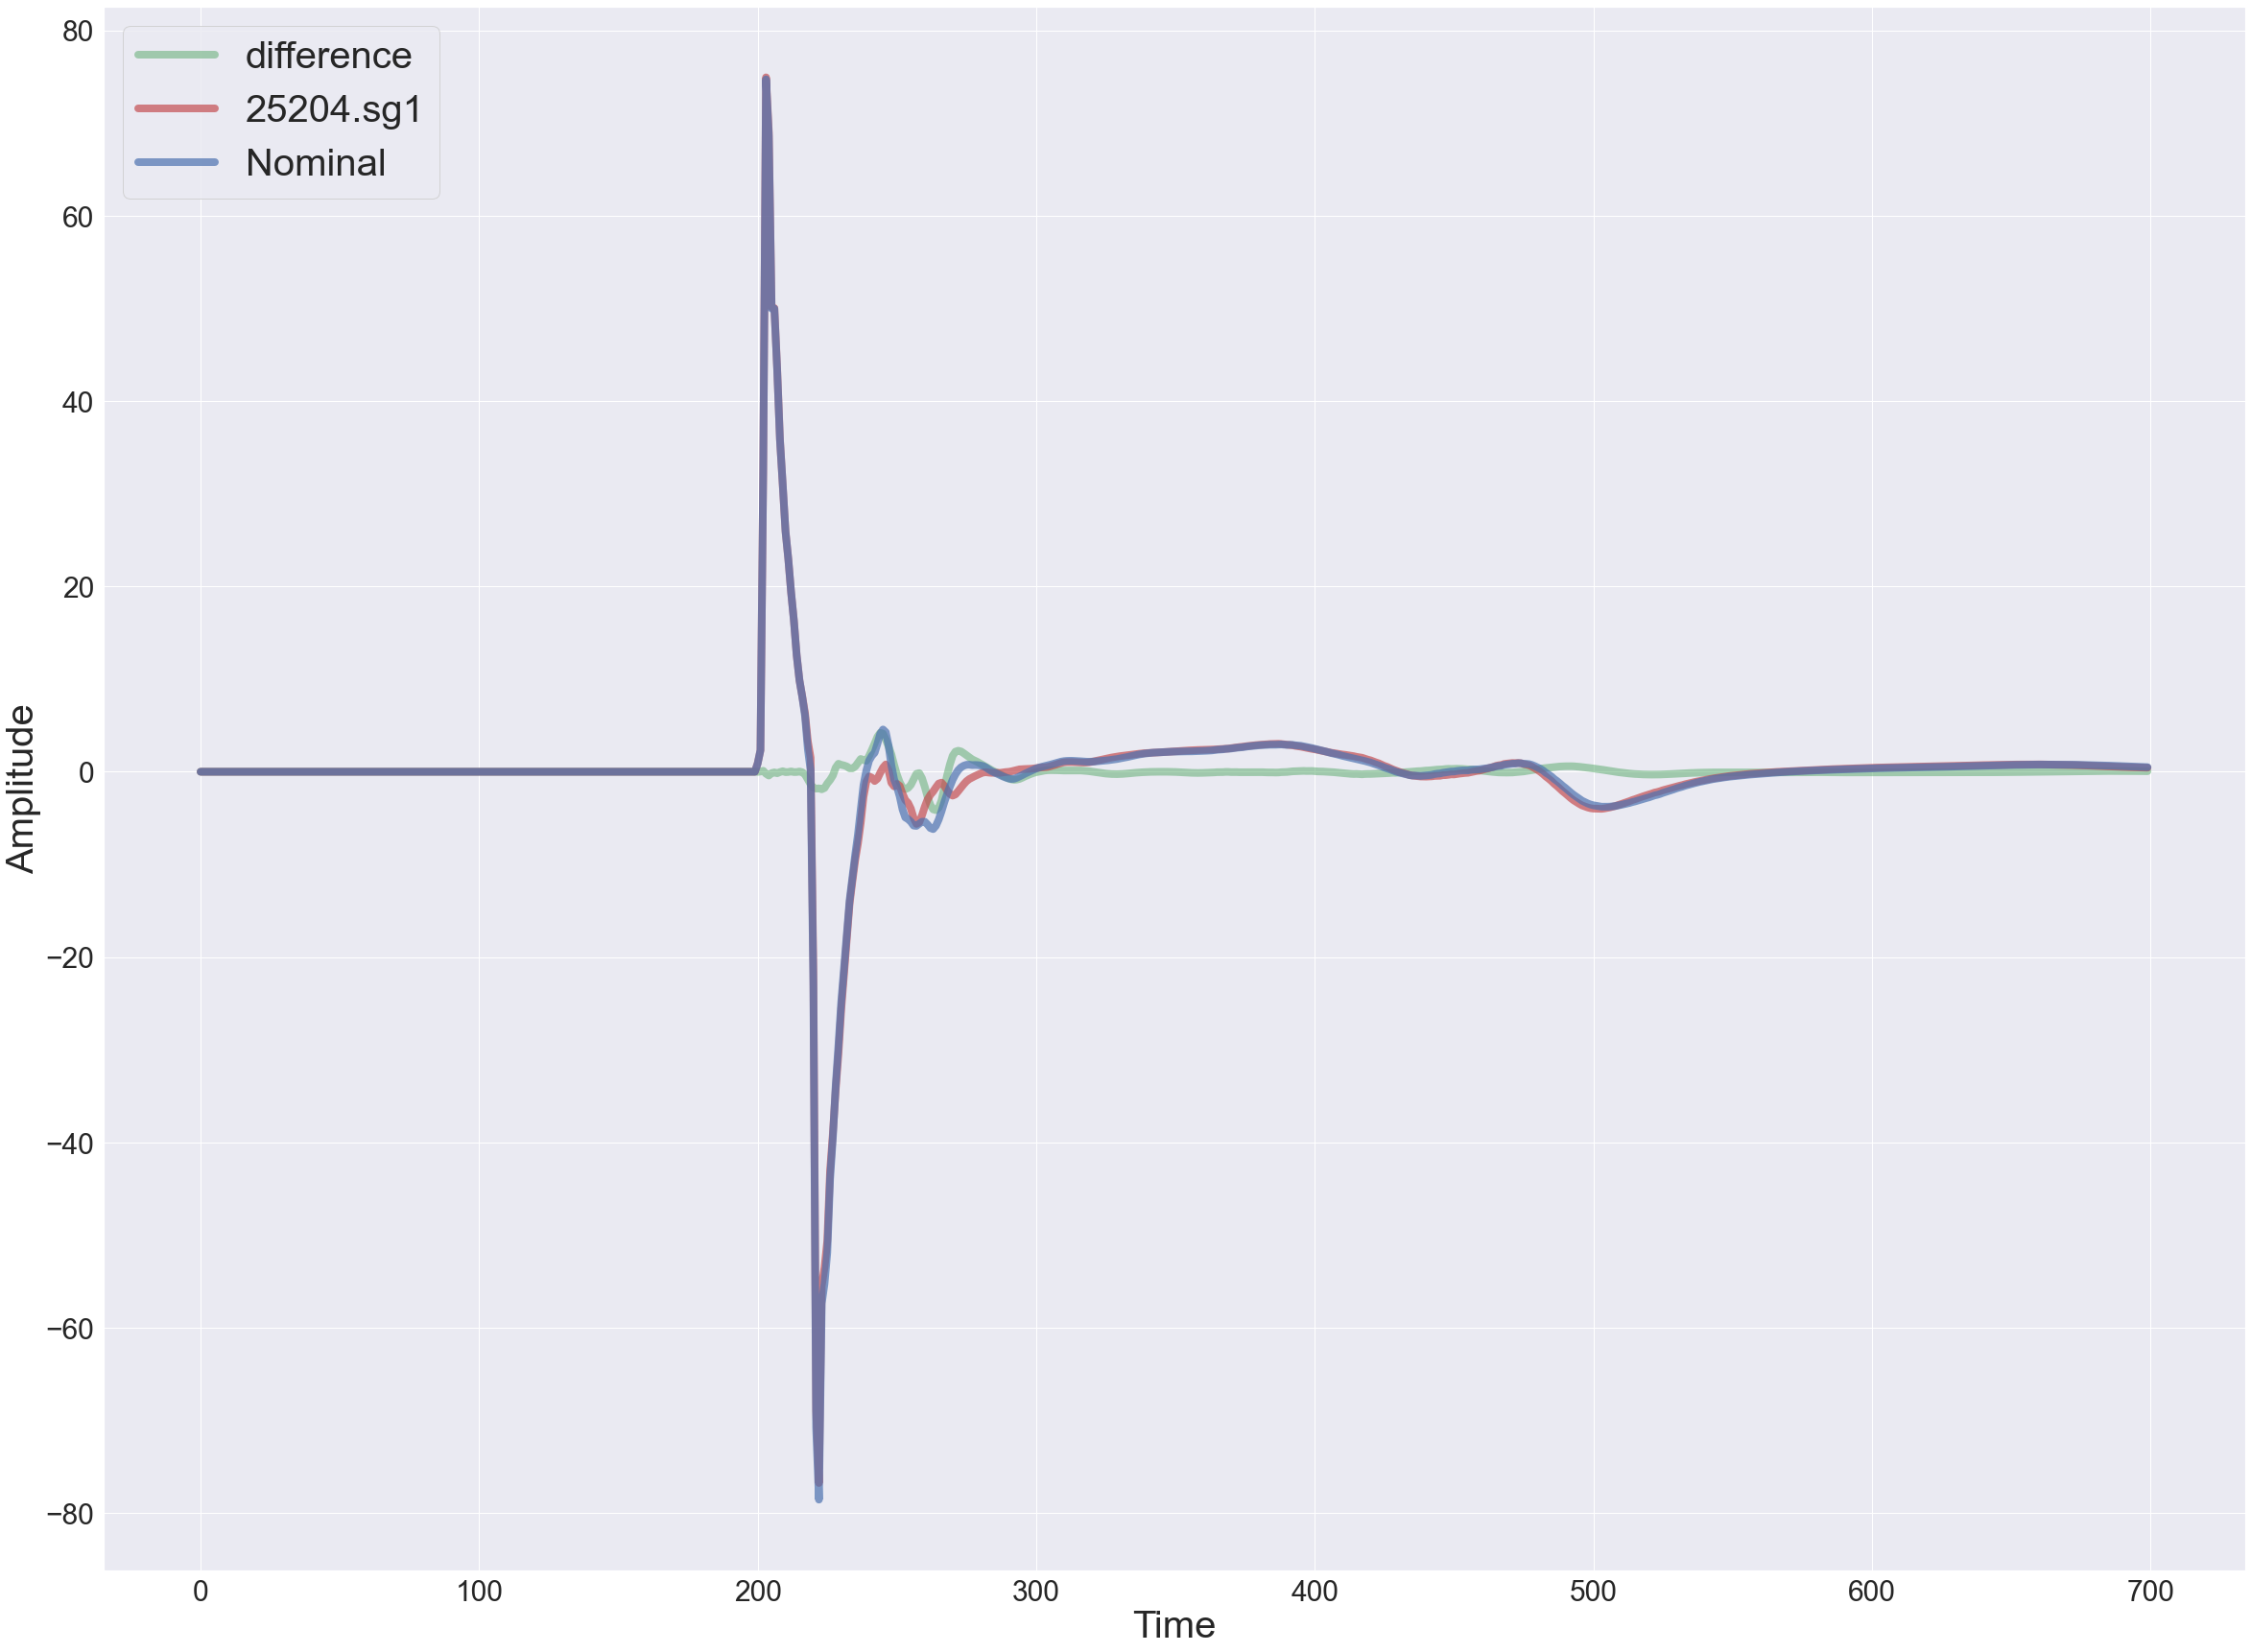

the correlation is  0.9974651816696463
peak-2-peak Nominal --> 153.27775
peak-2-peak 25204.sg1 --> 151.69946
peak-2-peak difference %  --> negative 1.0296928288678624




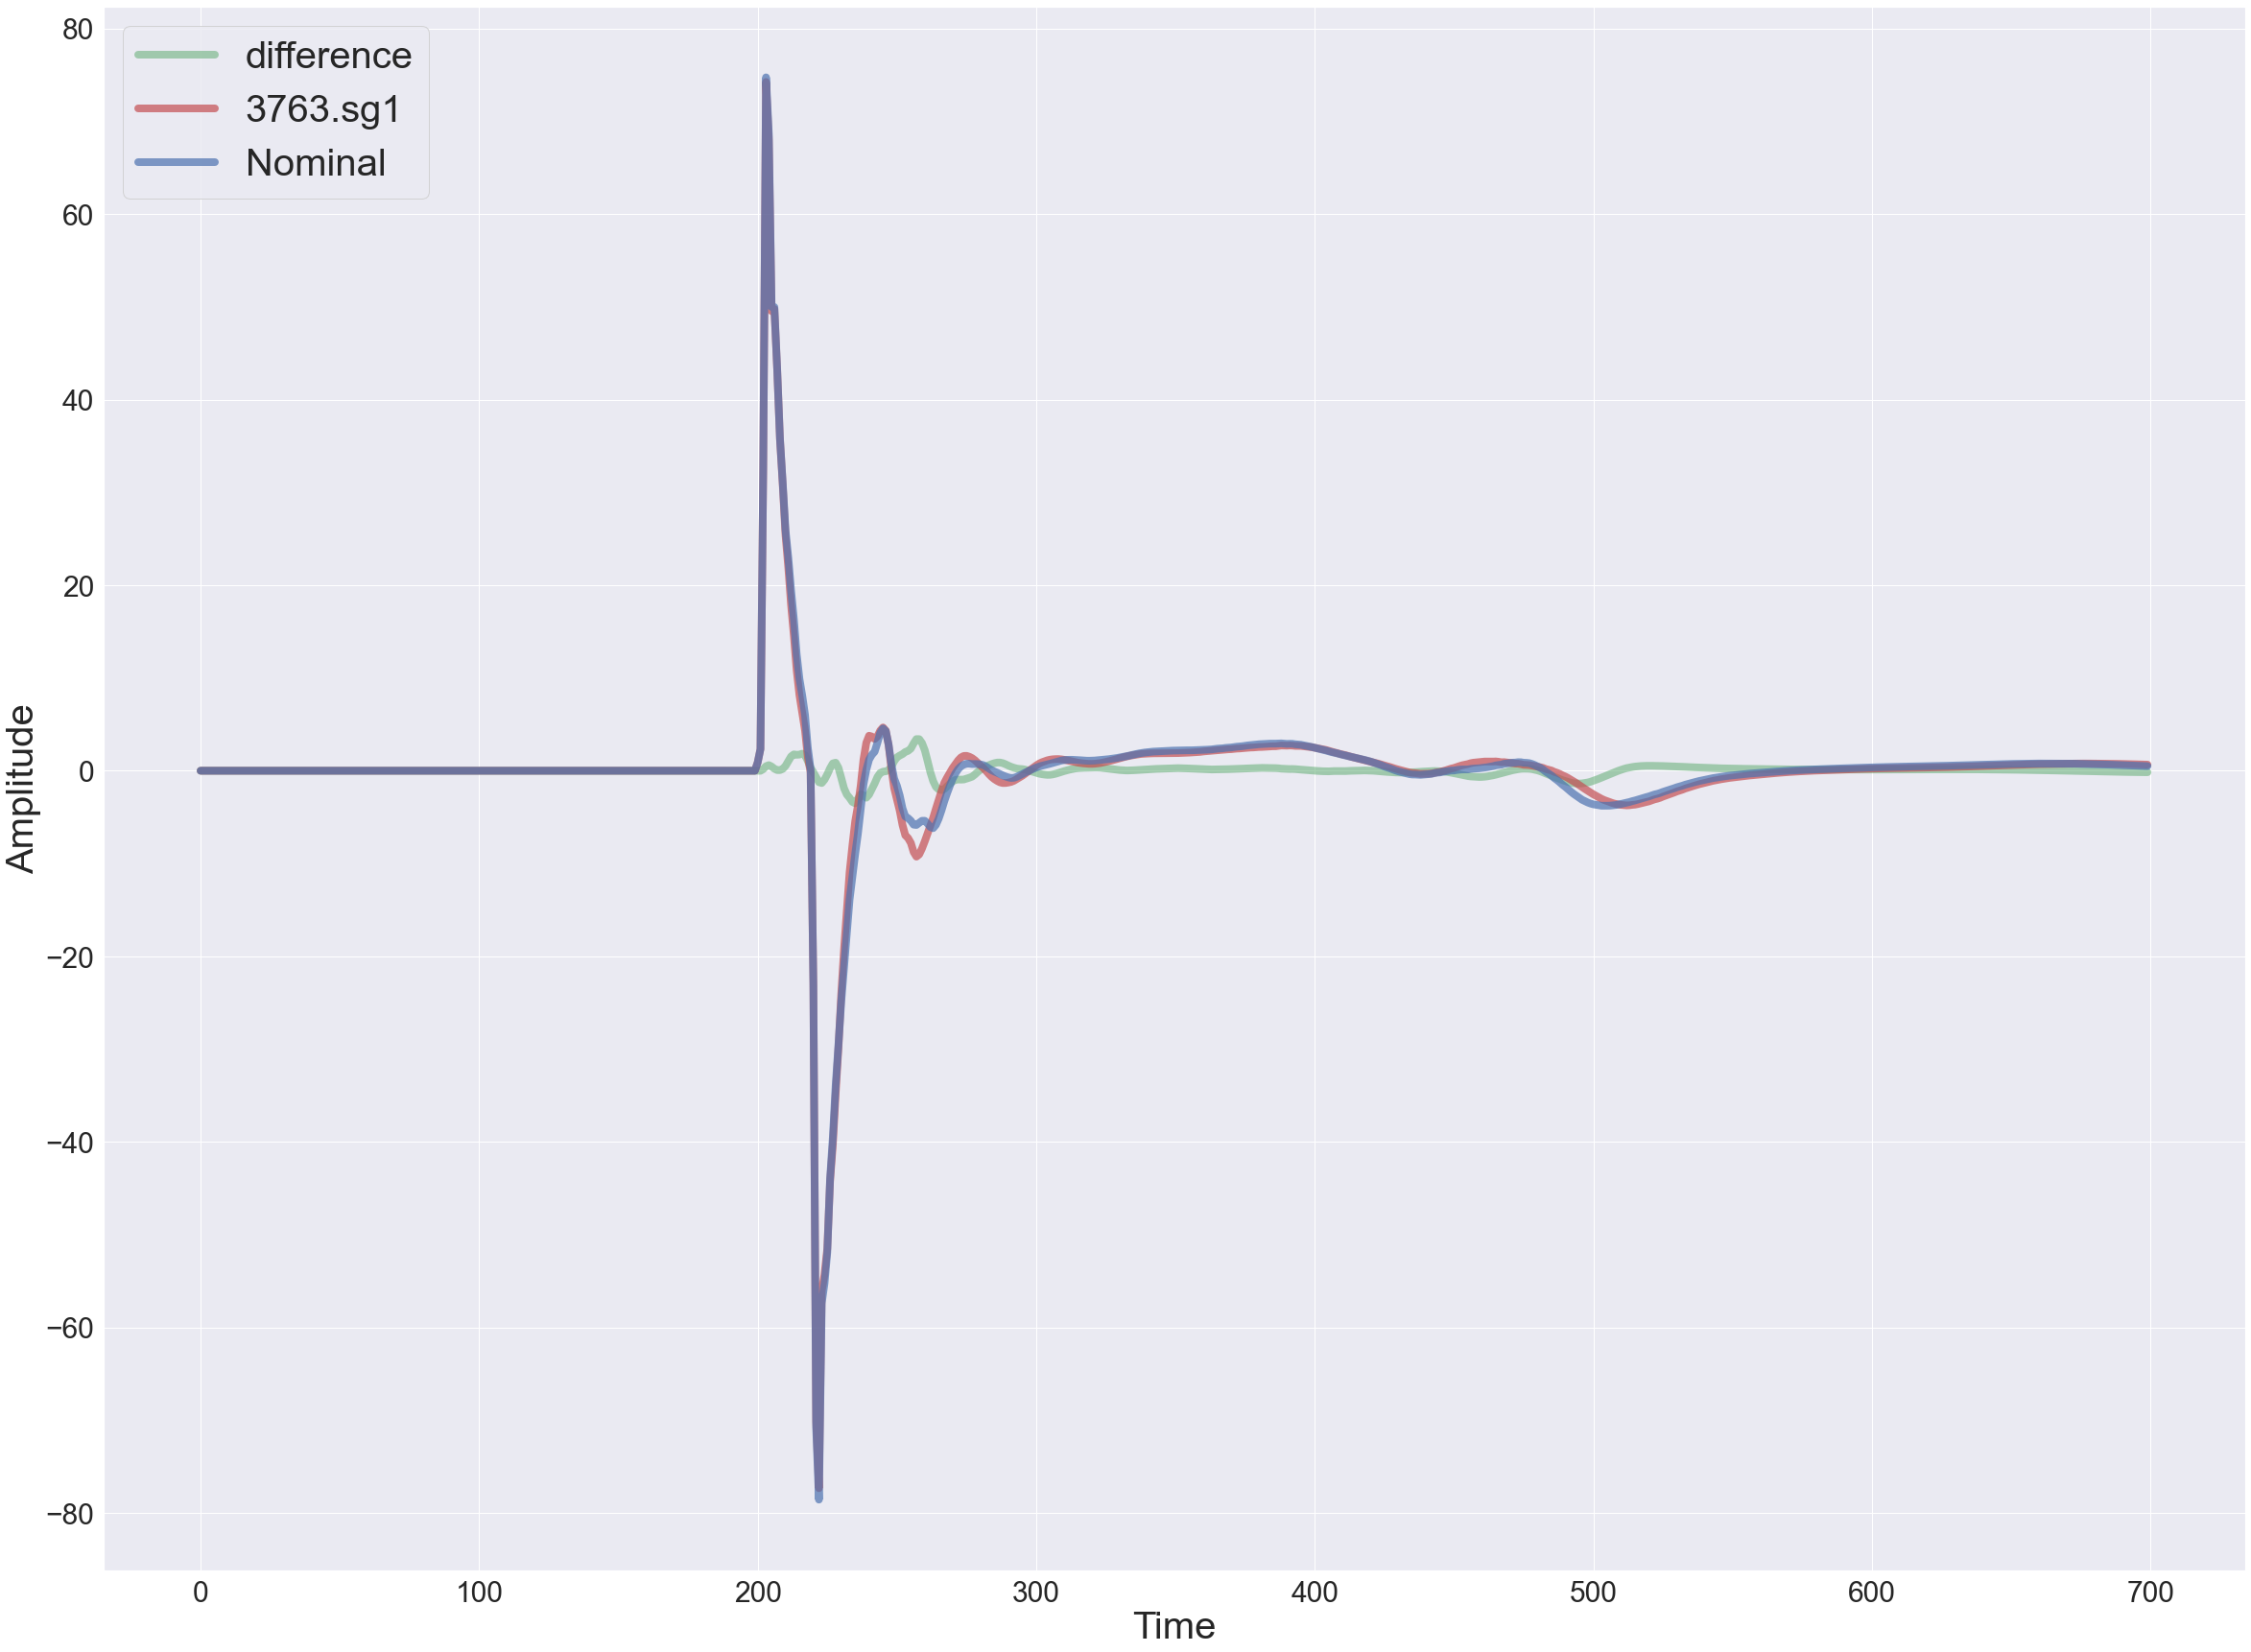

the correlation is  0.99750014521467
peak-2-peak Nominal --> 153.27775
peak-2-peak 3763.sg1 --> 151.55373
peak-2-peak difference %  --> negative 1.1247685981820557




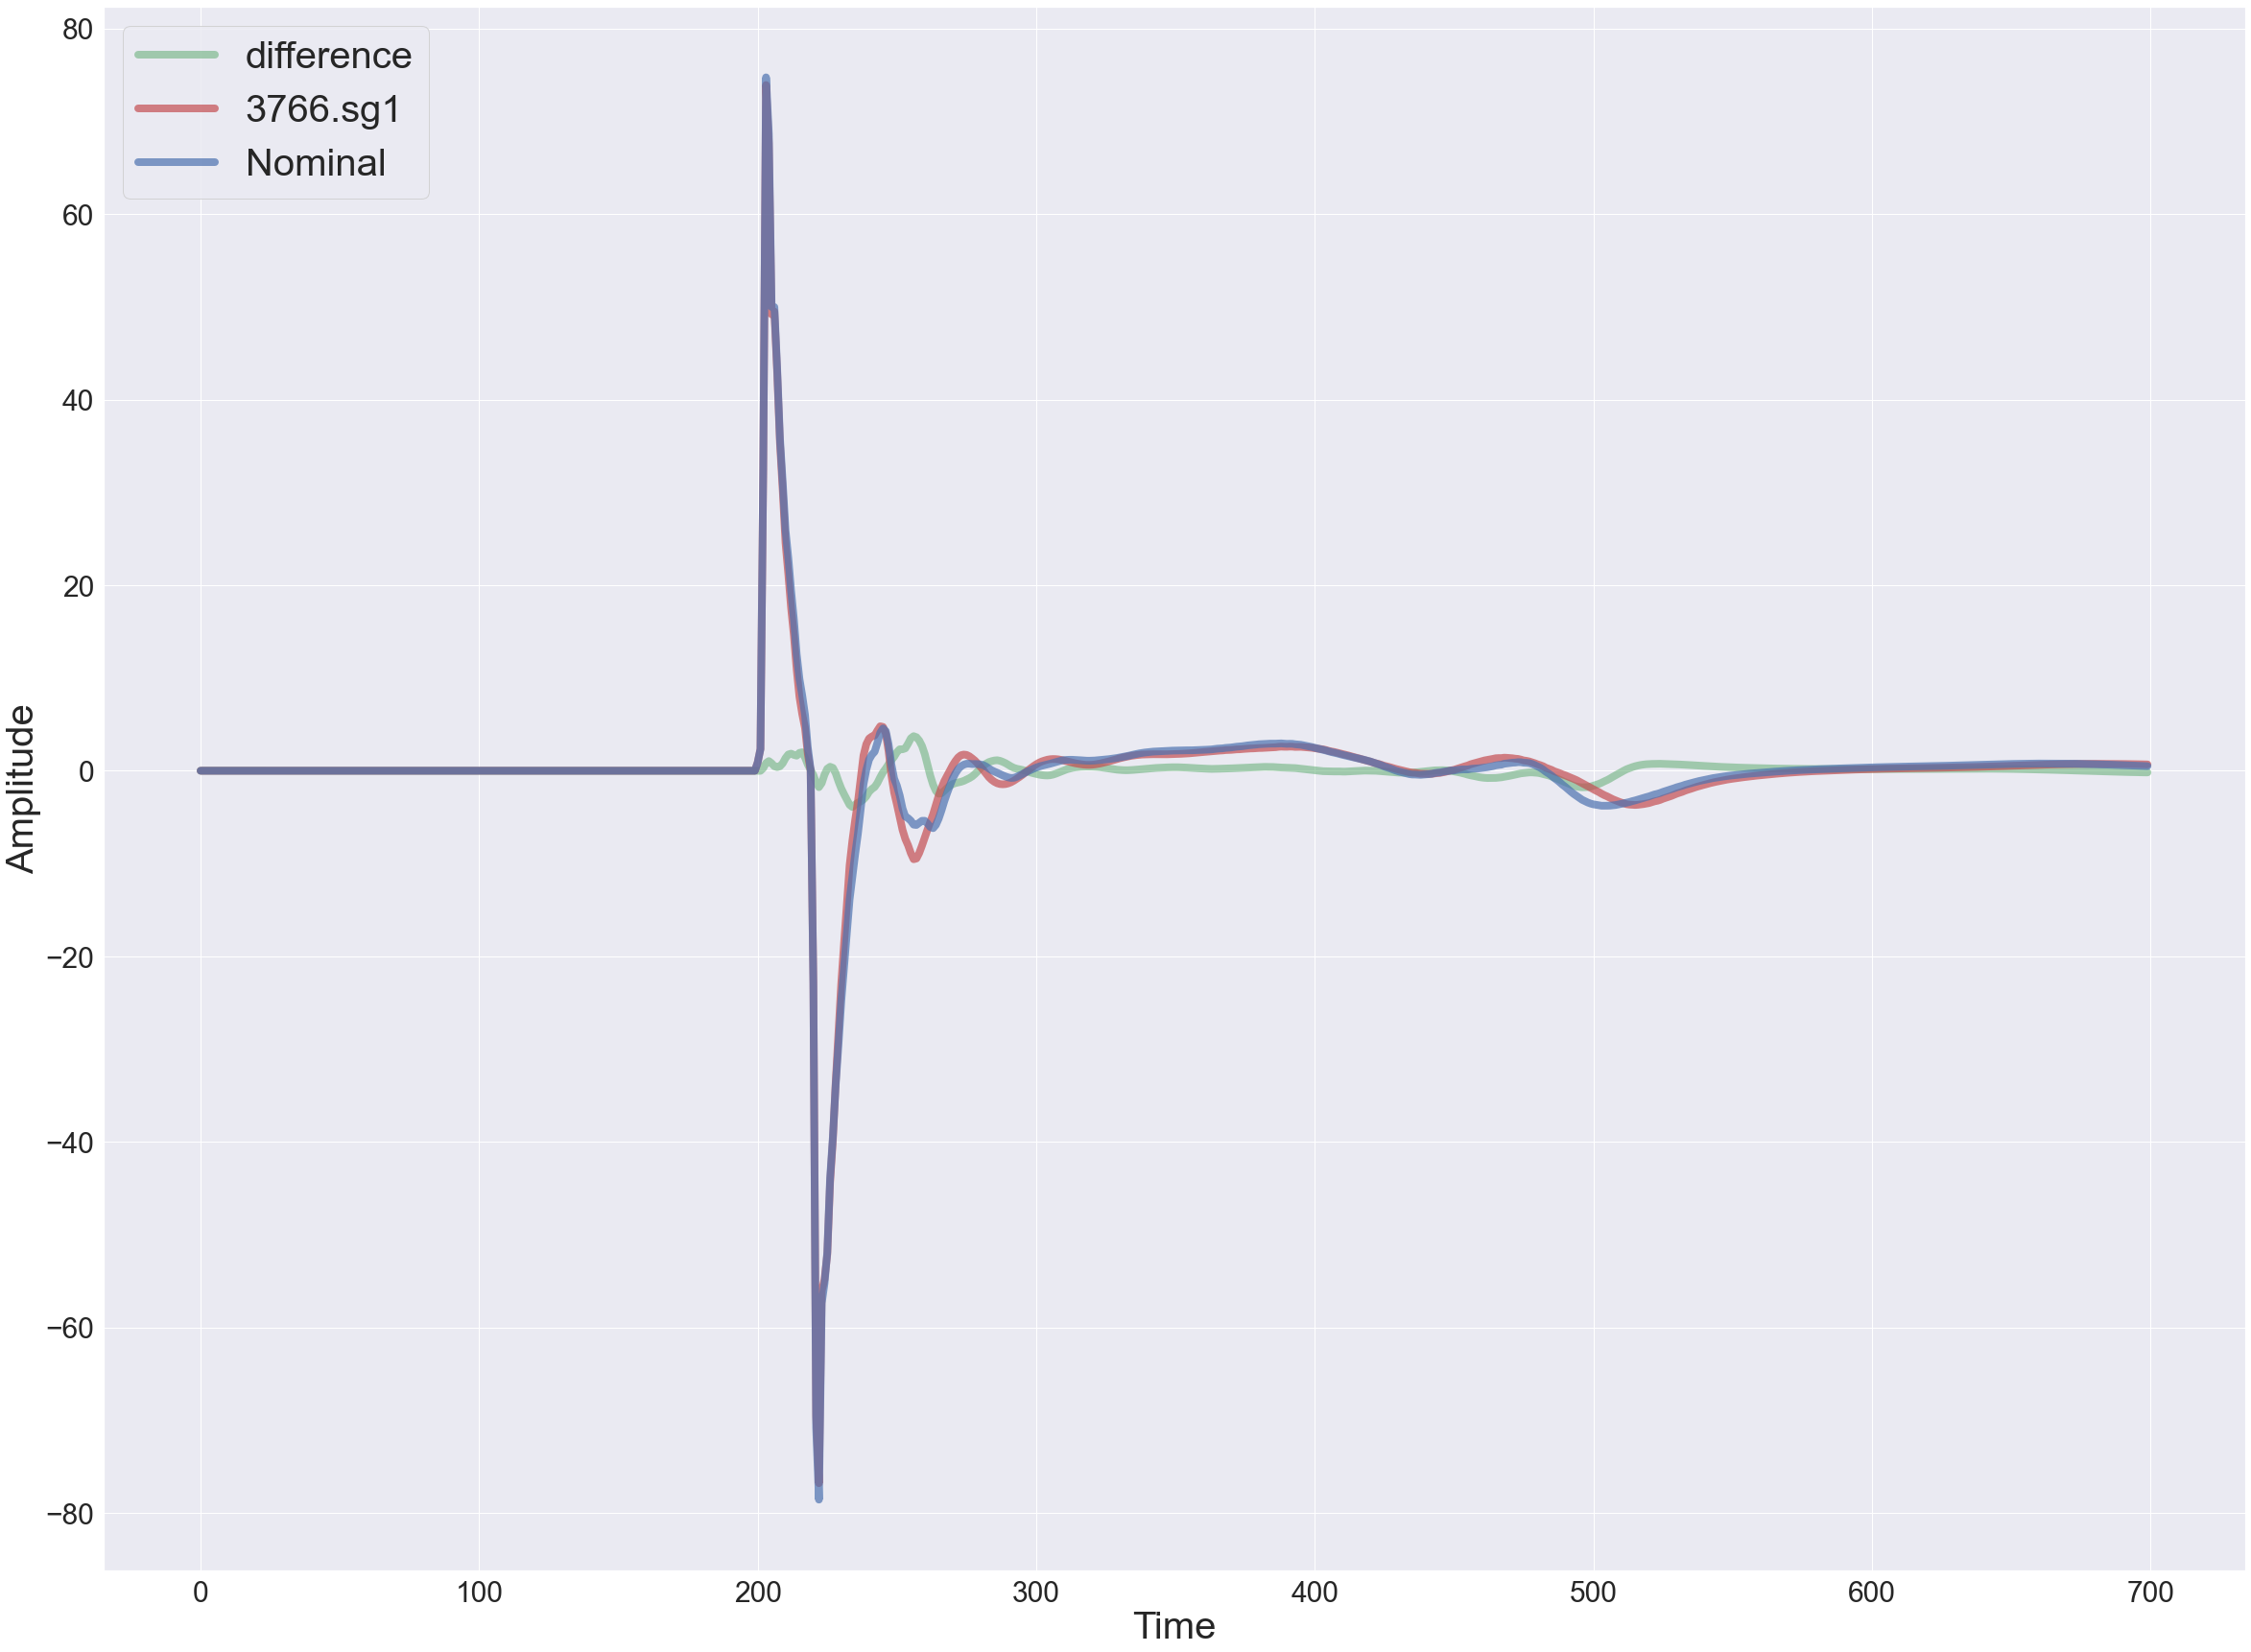

the correlation is  0.9964580242088446
peak-2-peak Nominal --> 153.27775
peak-2-peak 3766.sg1 --> 150.68613
peak-2-peak difference %  --> negative 1.6907998714751529




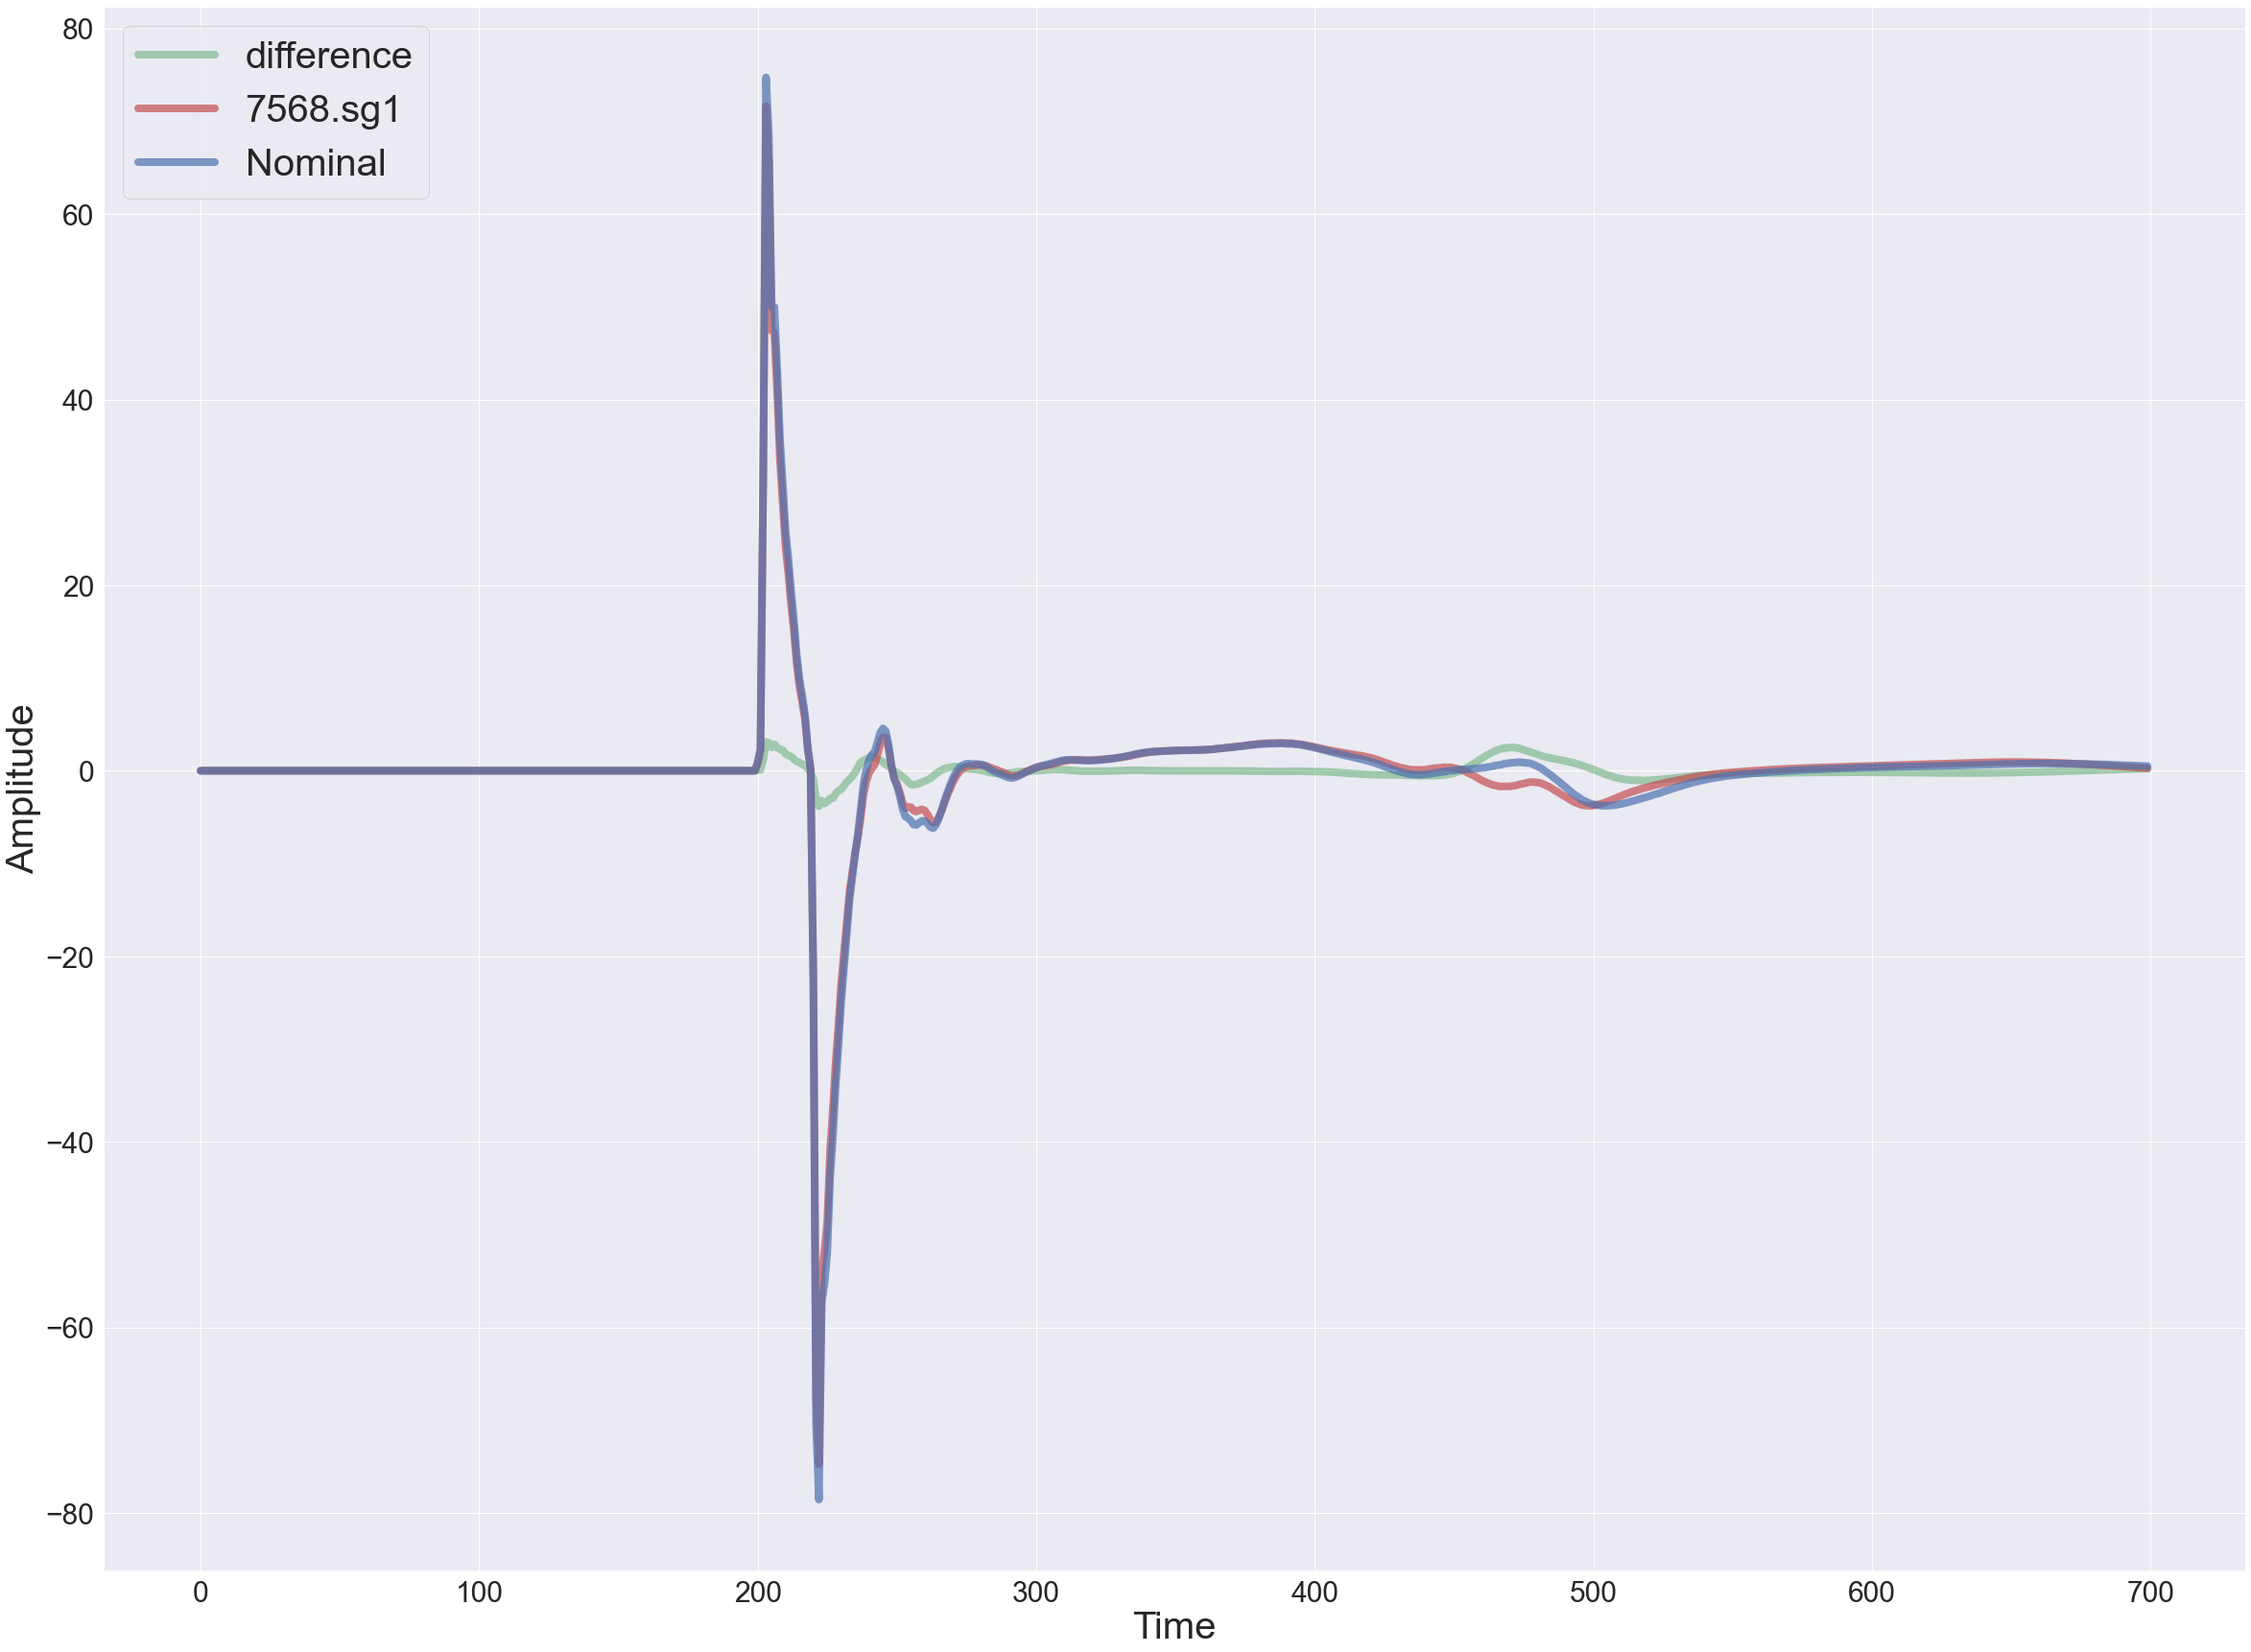

the correlation is  0.9978688761246371
peak-2-peak Nominal --> 153.27775
peak-2-peak 7568.sg1 --> 146.36007999999998
peak-2-peak difference %  --> negative 4.513159933519389




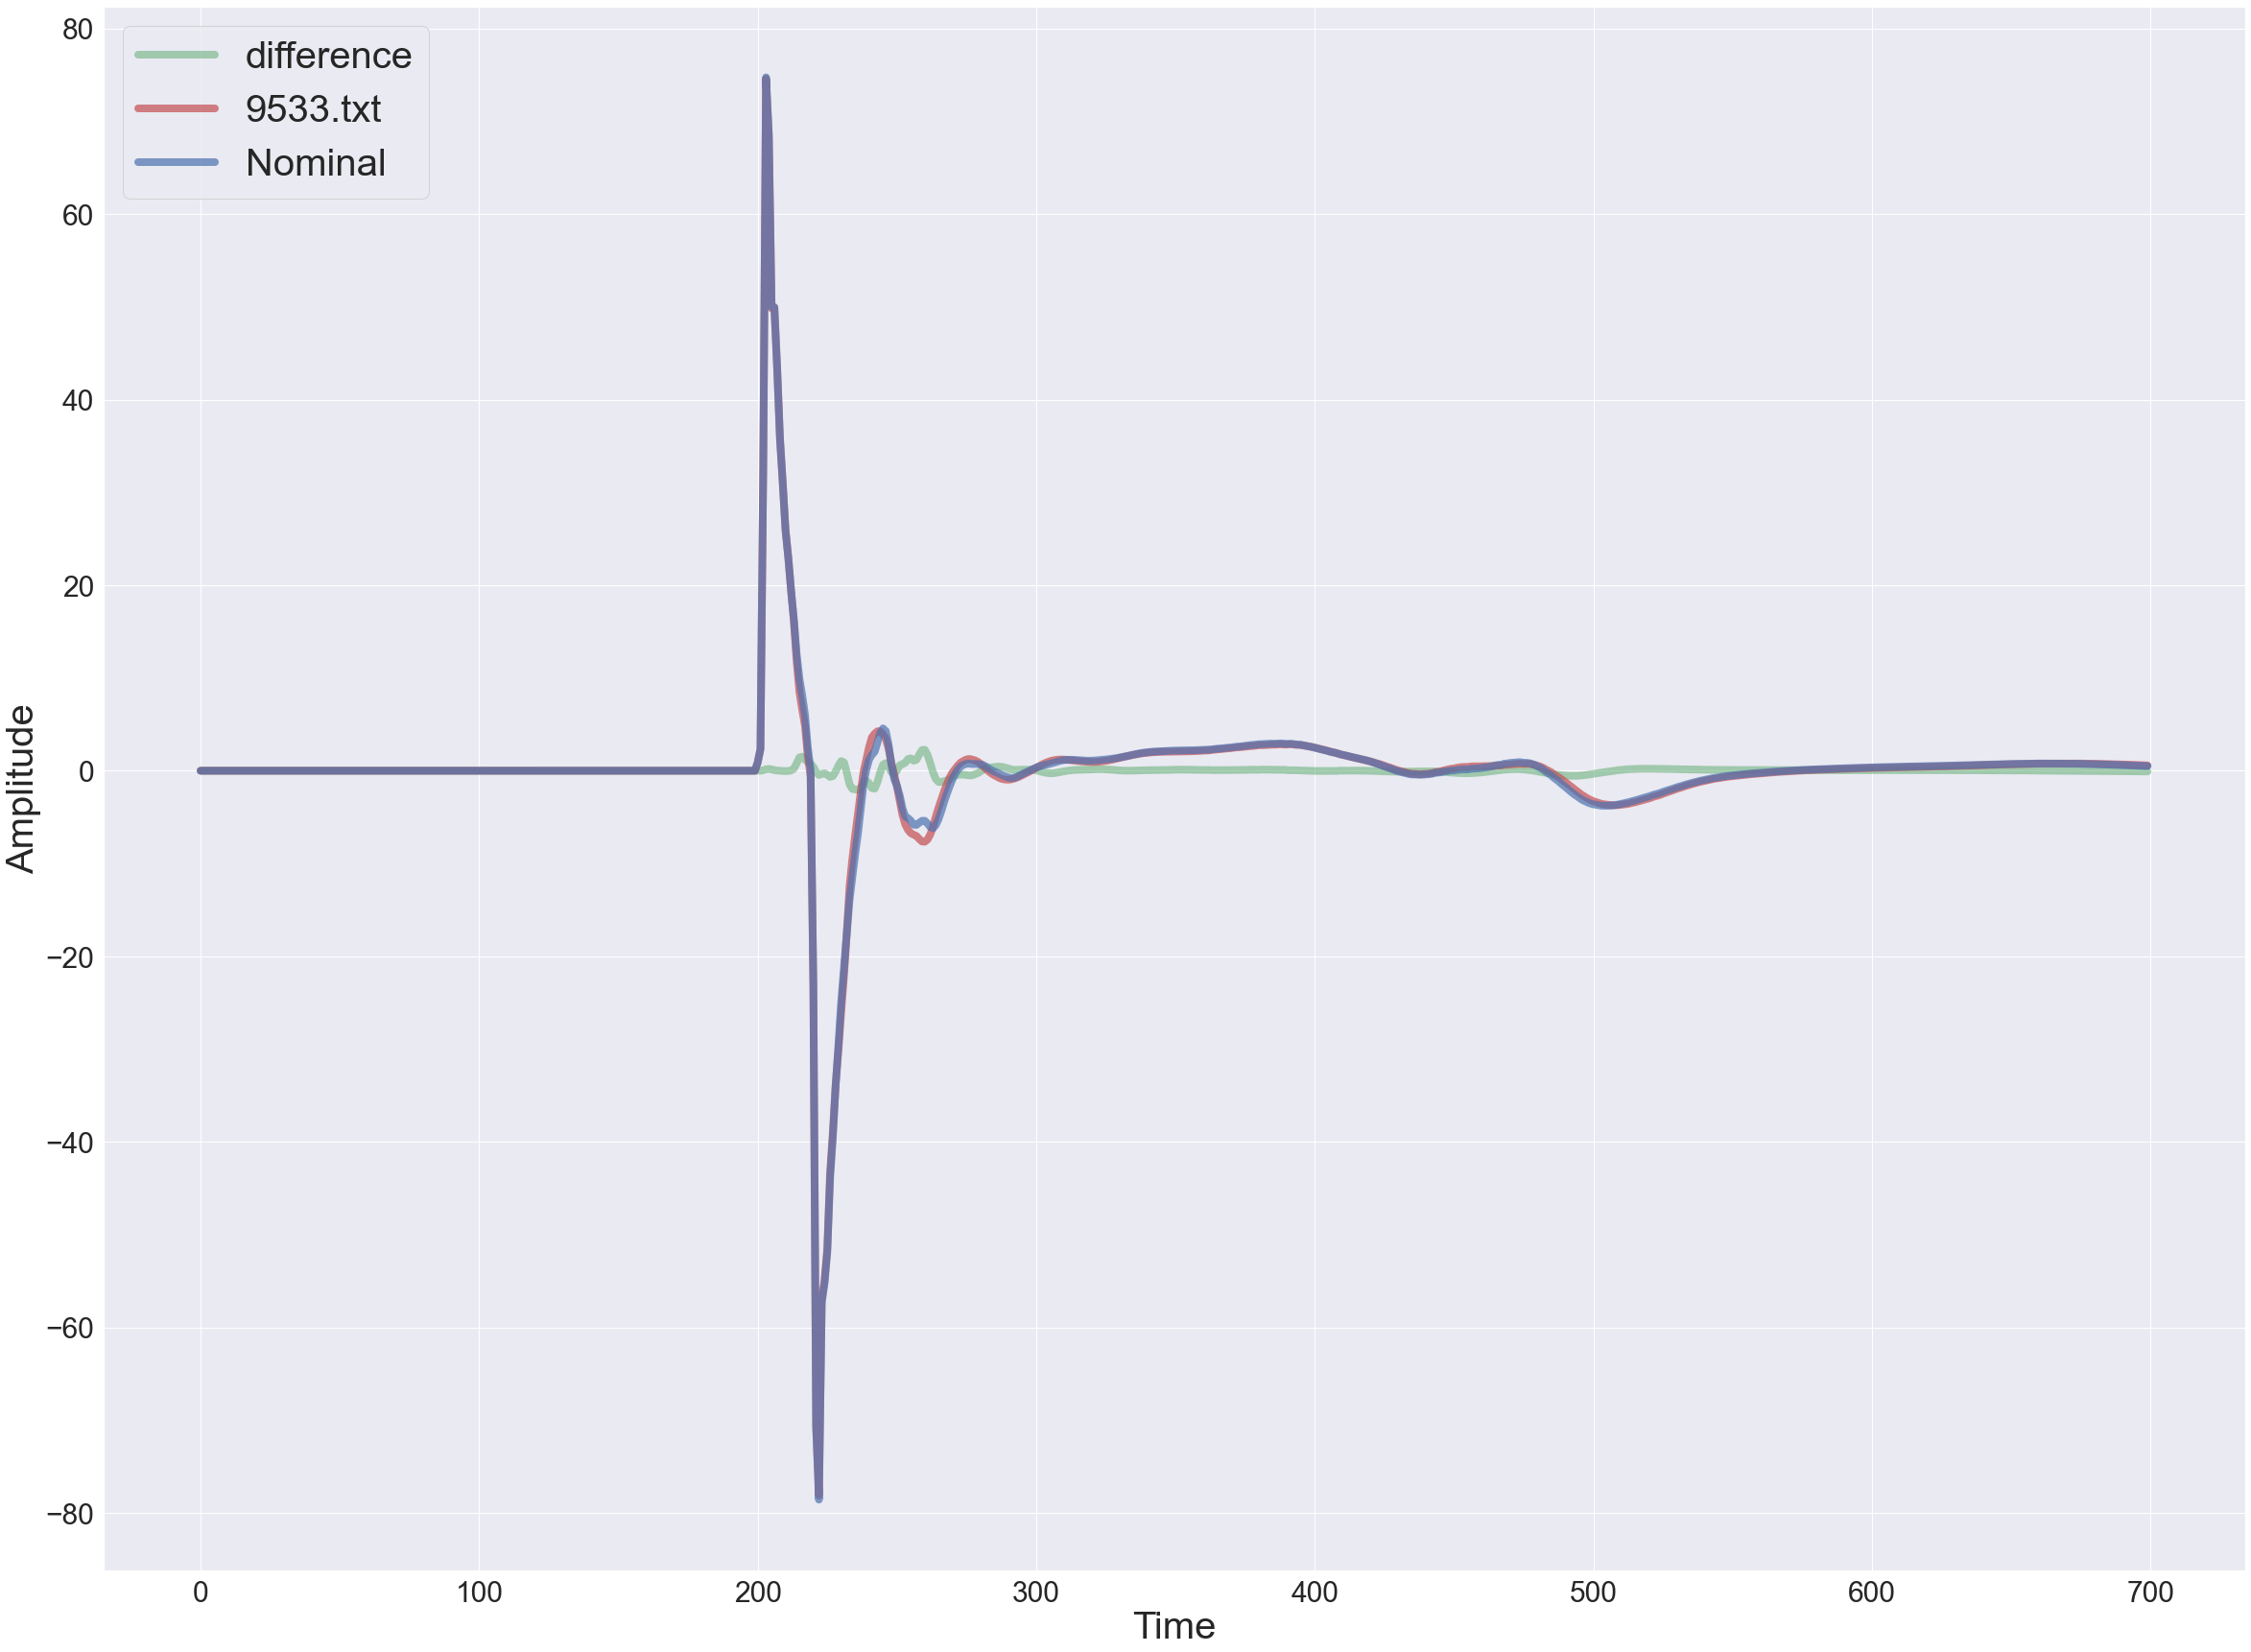

the correlation is  0.9991693749144833
peak-2-peak Nominal --> 153.27775
peak-2-peak 9533.txt --> 152.65571
peak-2-peak difference %  --> negative 0.4058253725671197




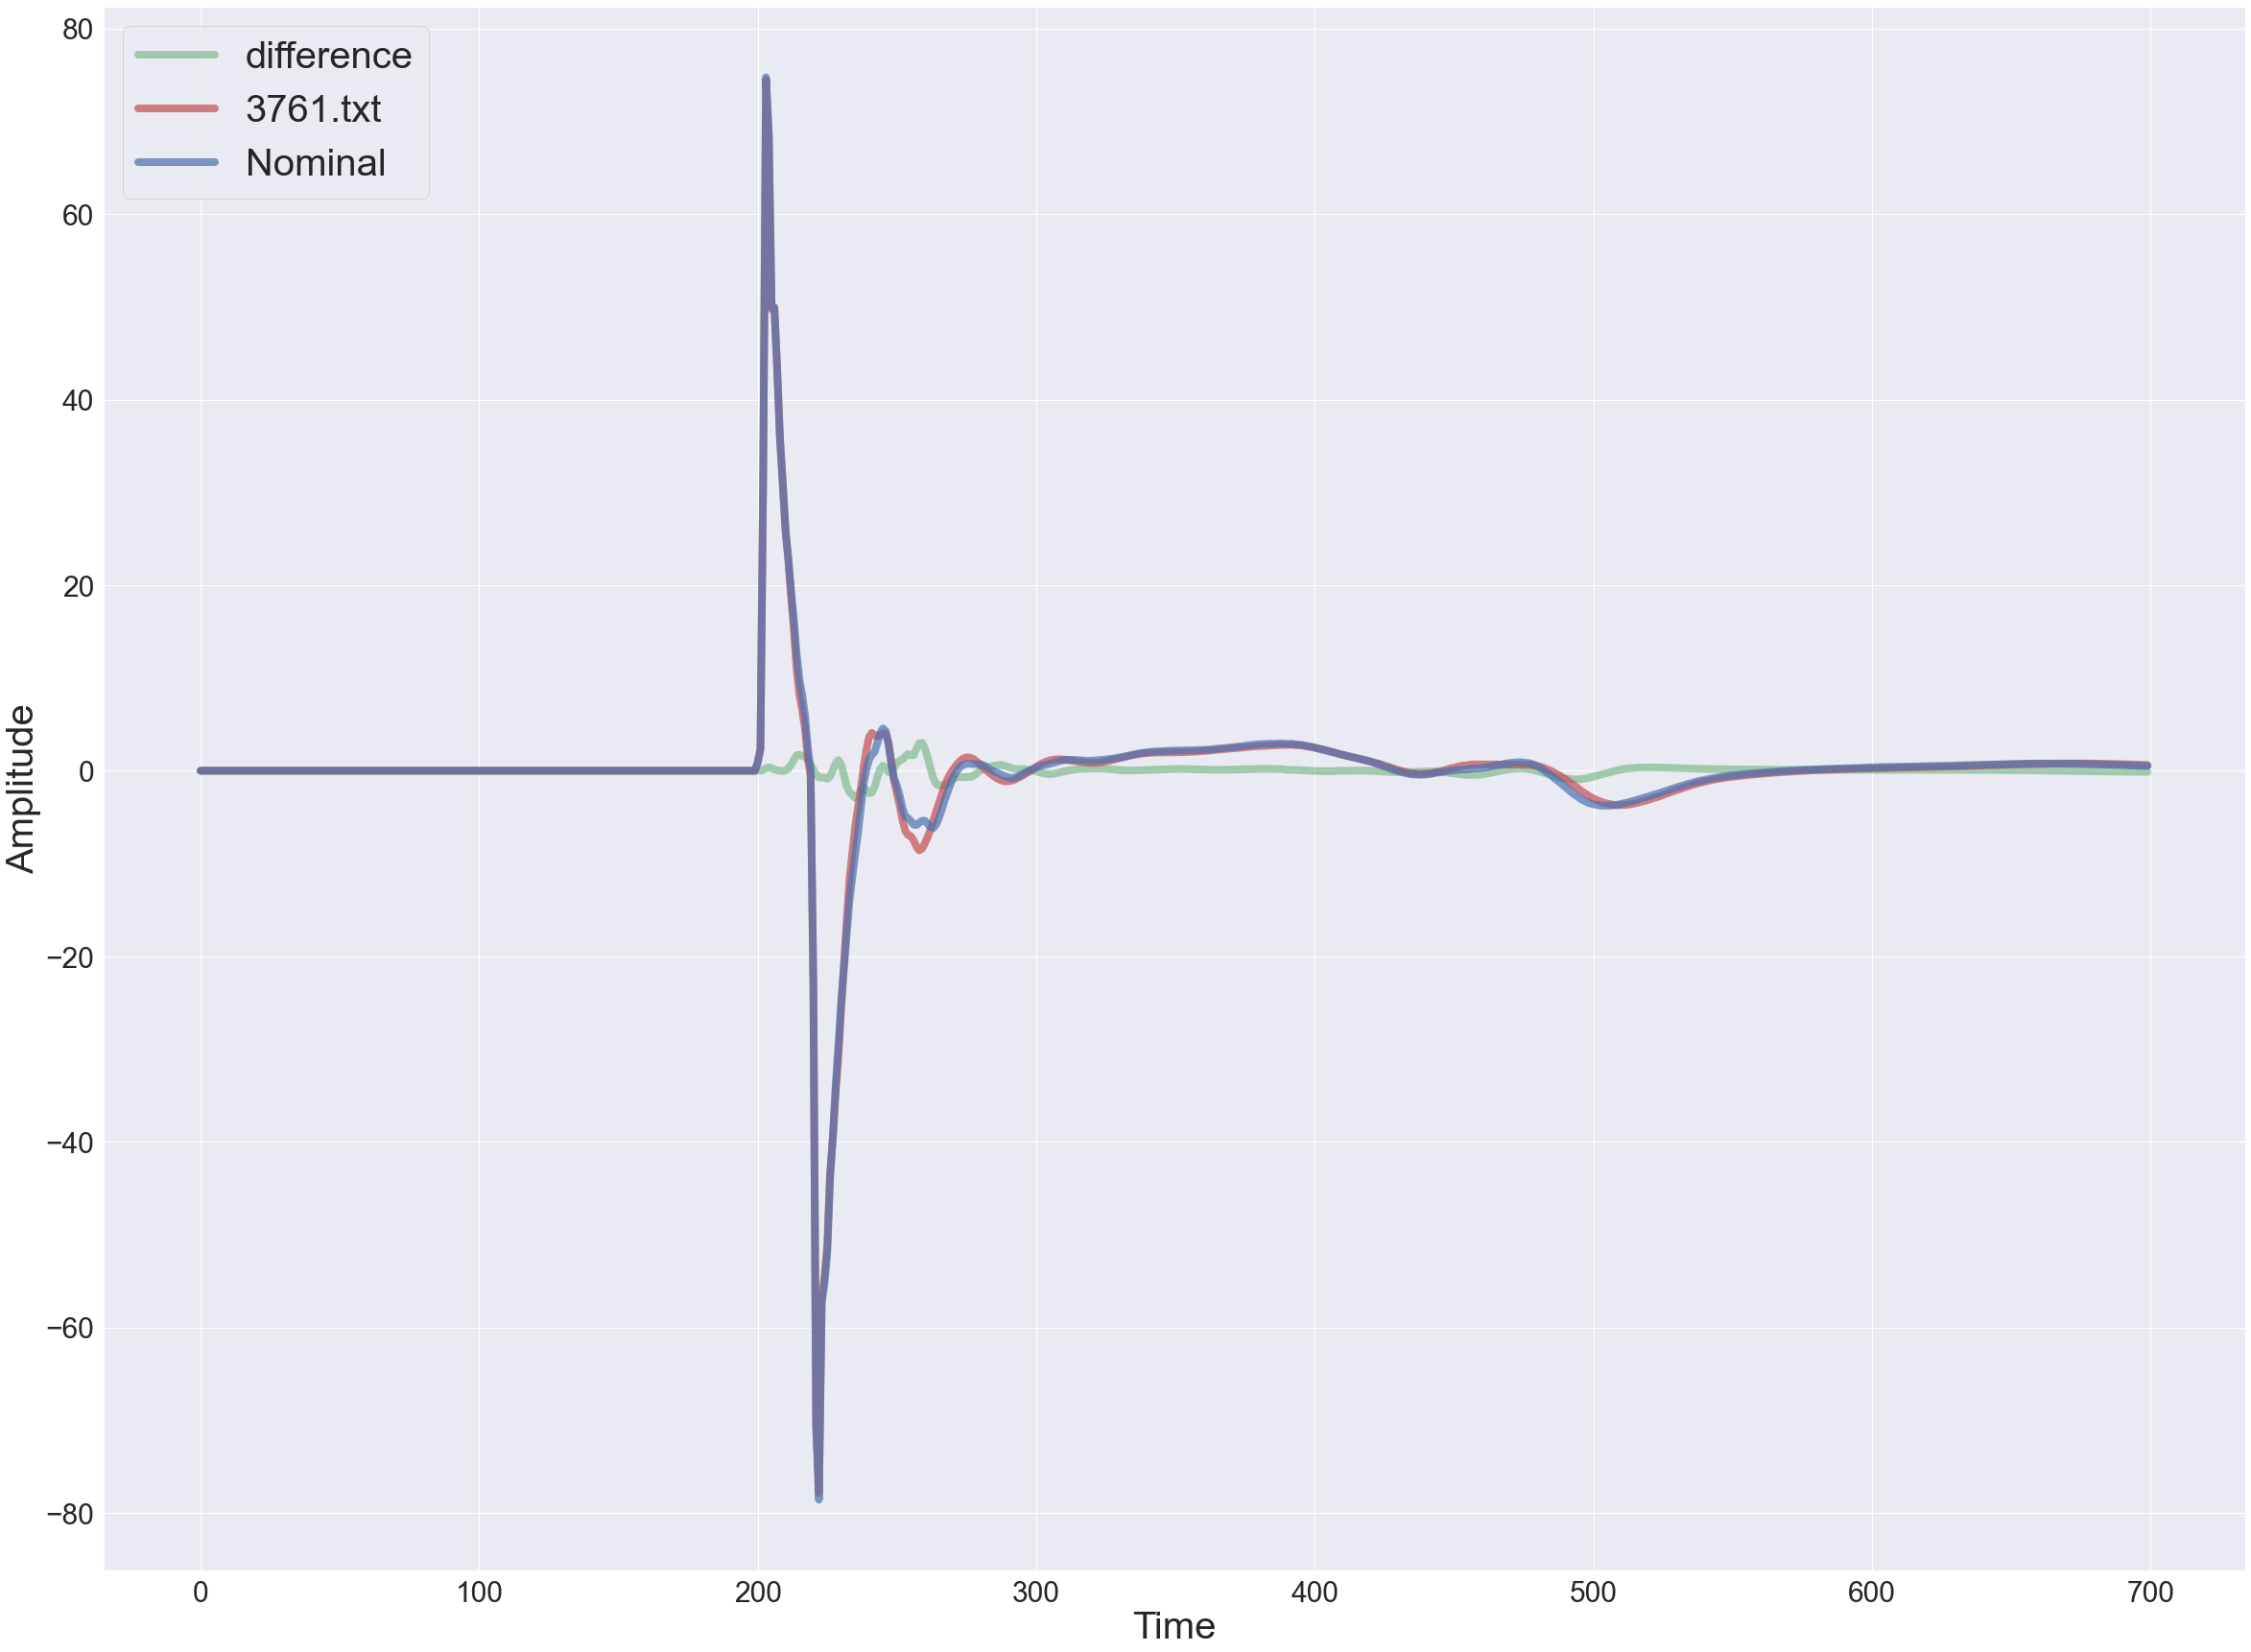

the correlation is  0.9984107324945865
peak-2-peak Nominal --> 153.27775
peak-2-peak 3761.txt --> 152.25617
peak-2-peak difference %  --> negative 0.6664894285047896




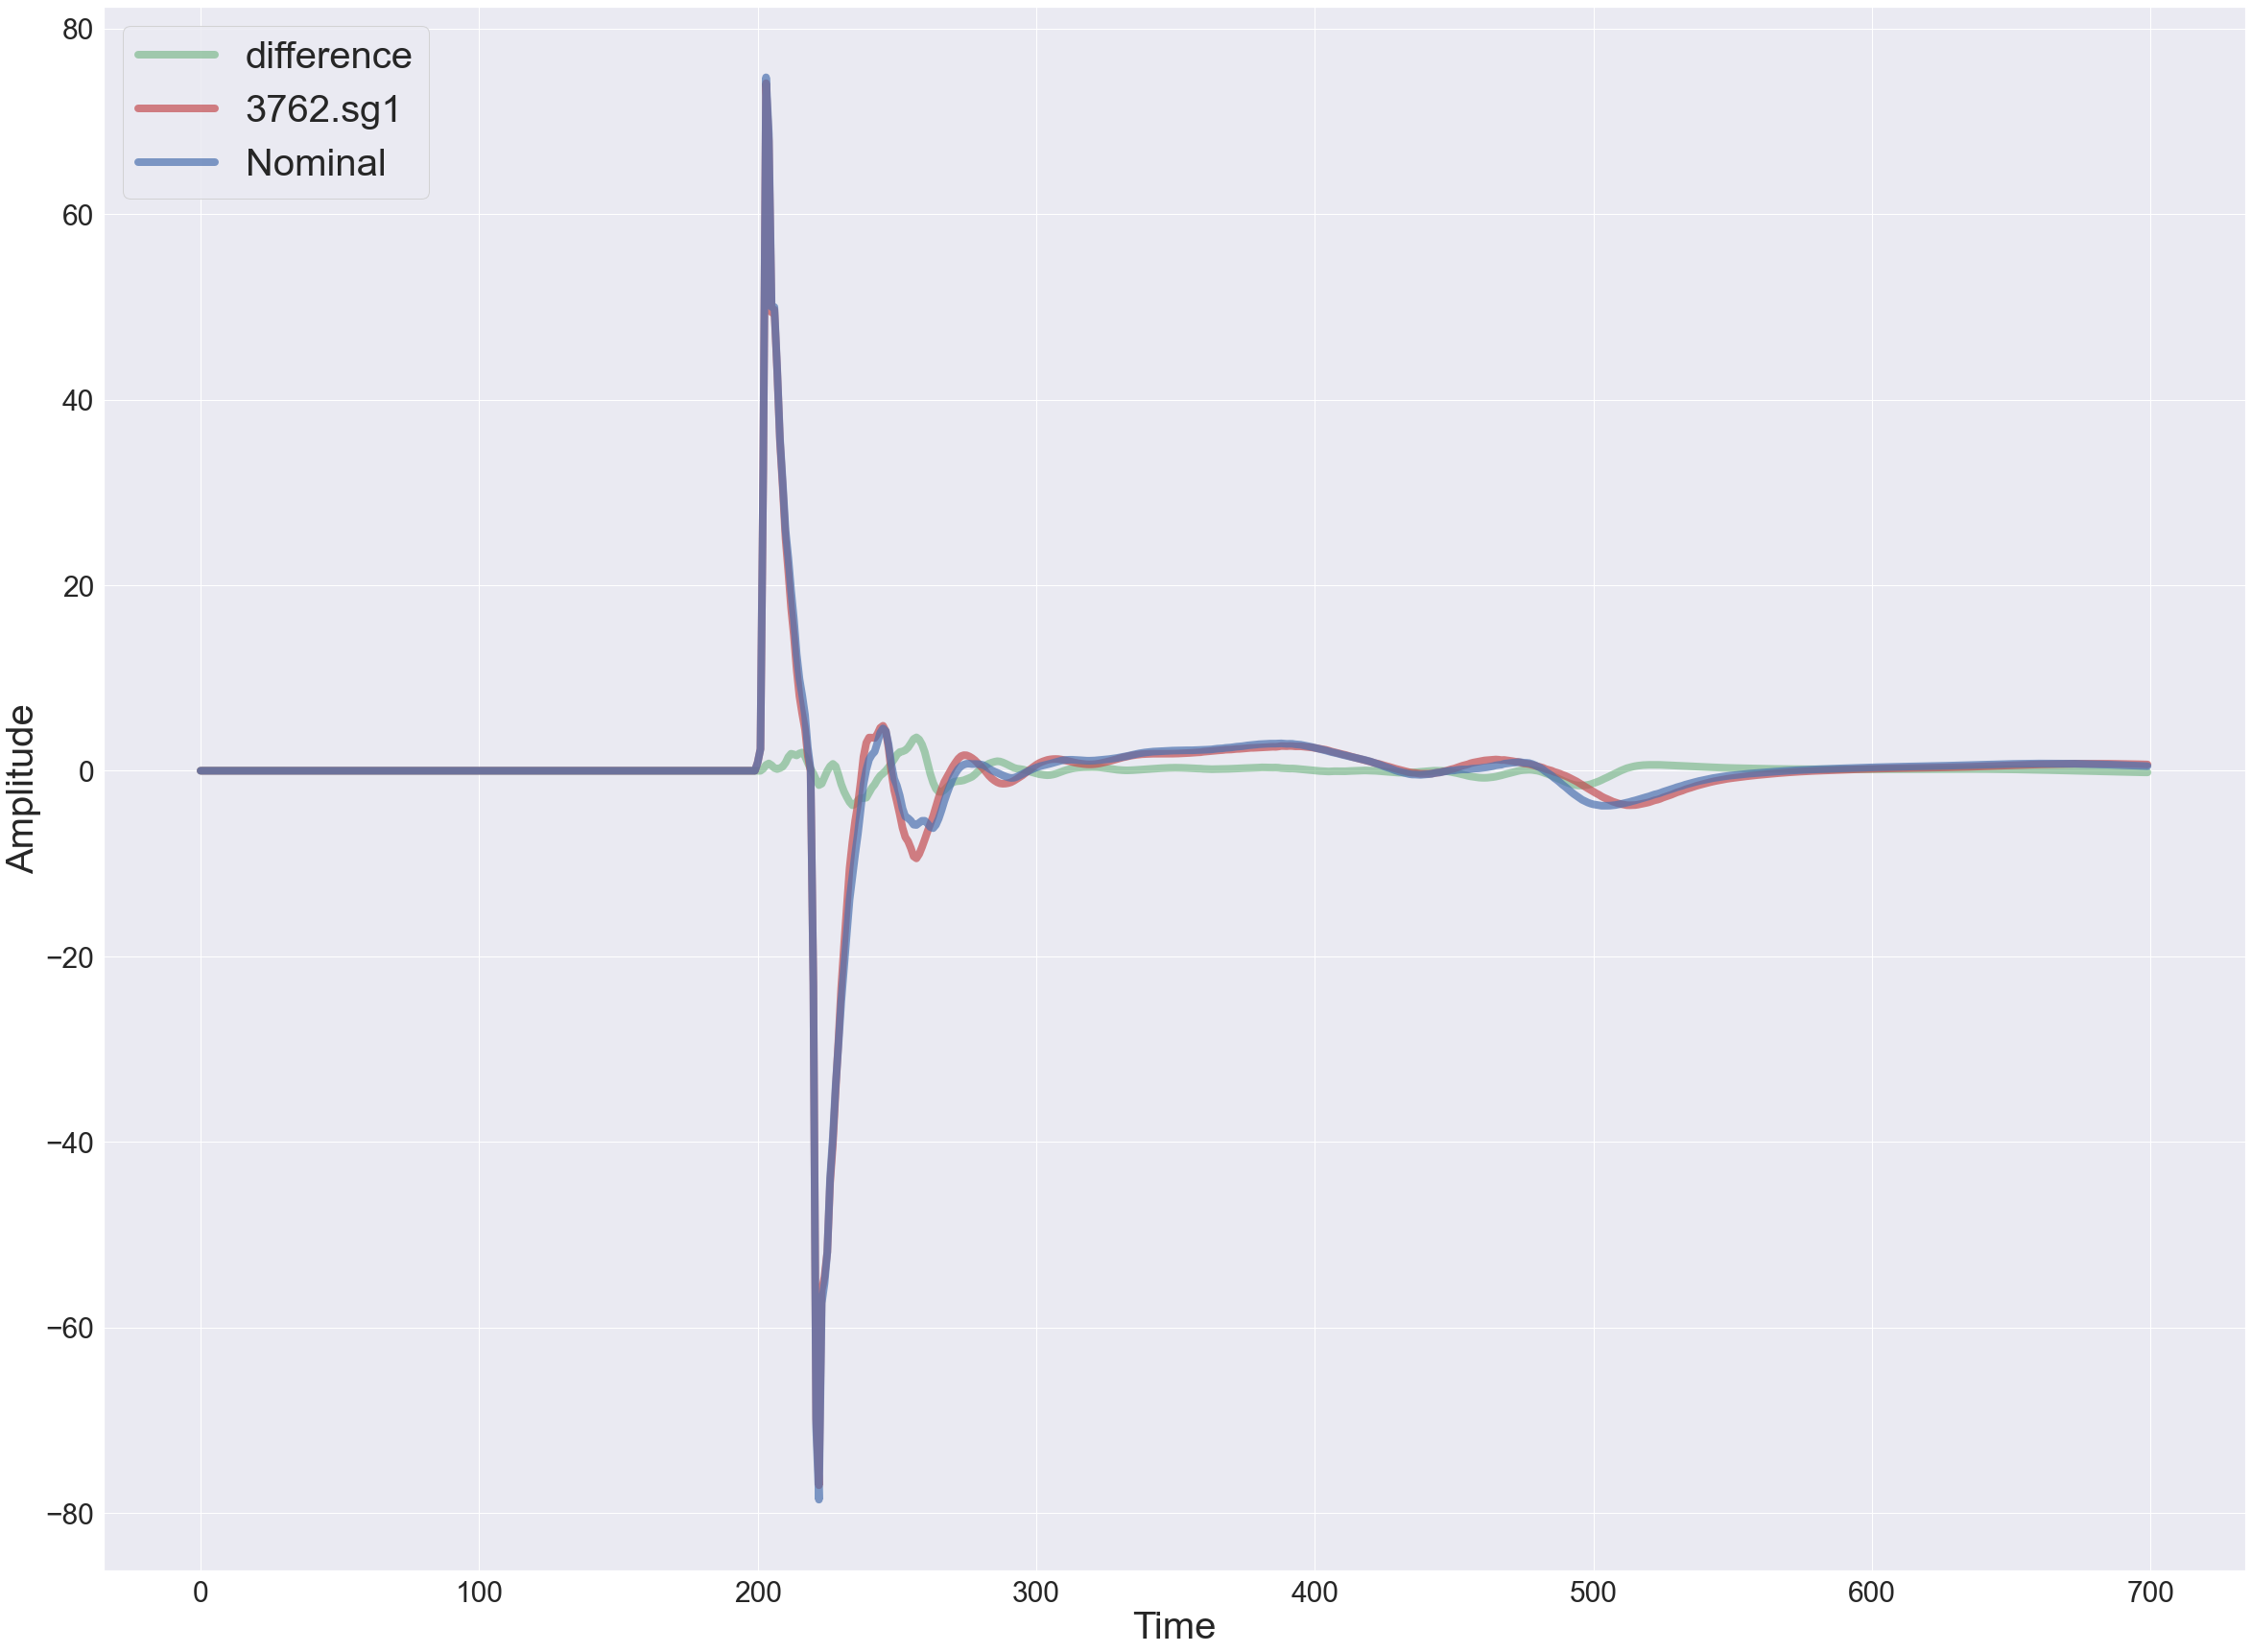

the correlation is  0.9969916686309245
peak-2-peak Nominal --> 153.27775
peak-2-peak 3762.sg1 --> 151.09888999999998
peak-2-peak difference %  --> negative 1.4215109498932588




In [111]:
singleQC((loadtimeseries(series)))